<a href="https://colab.research.google.com/github/Kimdoyeon123/Capstone/blob/main/dbscan_dieSize26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
drive.mount('./MyDrive', force_remount=True)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

Mounted at ./MyDrive


In [2]:
cd MyDrive/MyDrive

/content/MyDrive/MyDrive


In [3]:
df = pd.read_pickle("LSWMD.pkl")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [4]:
df.head(100)

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]
...,...,...,...,...,...,...
95,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot4,21.0,[[Training]],[[none]]
96,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot4,22.0,[[Training]],[[none]]
97,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot4,23.0,[[Training]],[[none]]
98,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot4,24.0,[[Training]],[[none]]


In [5]:
unique_failure_types = df['failureType'].astype(str).unique()
print(unique_failure_types)


["[['none']]" "[['Loc']]" '[]' "[['Edge-Loc']]" "[['Center']]"
 "[['Edge-Ring']]" "[['Scratch']]" "[['Random']]" "[['Near-full']]"
 "[['Donut']]"]


In [6]:
# 'failureType' 열에서 값이 빈 리스트인 행들만 필터링
df_with_empty_list = df[df['failureType'] == '[]']

# 결과 출력
print(df_with_empty_list)


                                                 waferMap  dieSize   lotName  \
35      [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   2460.0      lot2   
45      [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   2460.0      lot2   
69      [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   2460.0      lot3   
120     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   2460.0      lot5   
158     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2,...    533.0      lot7   
...                                                   ...      ...       ...   
811316  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1,...    600.0  lot47537   
811322  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...    600.0  lot47537   
811354  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...    600.0  lot47538   
811455  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...    600.0  lot47543   
811456  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...    600.0  lot47543   

        waferIndex trianTestLabel failu

In [7]:
df_with_empty_list.shape[0]
df_result = df_with_empty_list[df_with_empty_list['dieSize'] == 676]
print(df_result)

                                                 waferMap  dieSize   lotName  \
223874  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,...    676.0  lot14087   
223875  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,...    676.0  lot14087   
223876  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,...    676.0  lot14087   
223877  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,...    676.0  lot14087   
223878  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,...    676.0  lot14087   
223879  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,...    676.0  lot14087   
223880  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,...    676.0  lot14087   
223881  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,...    676.0  lot14087   
223882  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,...    676.0  lot14087   
223883  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,...    676.0  lot14087   
223884  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,...    676.0  lot14087   
223885  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [8]:
none_label = pd.DataFrame(df_result)
none_label

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
223874,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,...",676.0,lot14087,1.0,[],[]
223875,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,...",676.0,lot14087,2.0,[],[]
223876,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,...",676.0,lot14087,3.0,[],[]
223877,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,...",676.0,lot14087,4.0,[],[]
223878,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,...",676.0,lot14087,5.0,[],[]
223879,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,...",676.0,lot14087,6.0,[],[]
223880,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,...",676.0,lot14087,7.0,[],[]
223881,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,...",676.0,lot14087,8.0,[],[]
223882,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,...",676.0,lot14087,9.0,[],[]
223883,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,...",676.0,lot14087,10.0,[],[]


In [36]:
index_list = none_label.index.to_list()

In [38]:
import numpy as np
from sklearn.cluster import DBSCAN

# 클러스터링 결과를 저장할 리스트
all_clusters = []

# 각 waferMap에 대해 DBSCAN 클러스터링 수행
for idx in index_list[:180]:
    wafer_map = none_label.loc[idx, 'waferMap']

    # 2의 위치를 찾아서 좌표 목록을 생성
    points = np.column_stack(np.where(wafer_map == 2))

    if points.size > 0:
        # DBSCAN 모델을 생성하고 클러스터링 수행
        dbscan = DBSCAN(eps=2, min_samples=4)
        cluster_labels = dbscan.fit_predict(points)

        # 모든 포인트를 정상 반도체칩(1)으로 변경
        wafer_map[np.where(wafer_map == 2)] = 1

        # 클러스터 정보 저장 및 클러스터로 식별된 포인트들만 다시 결함칩(2)으로 변경
        cluster_data = []
        for label in np.unique(cluster_labels):
            if label != -1:
                cluster_points = points[cluster_labels == label]
                cluster_data.append((label, cluster_points))
                for point in cluster_points:
                    wafer_map[point[0], point[1]] = 2
        all_clusters.append(cluster_data)

        # 변경된 wafer_map을 원래 데이터프레임에 다시 저장
        none_label.at[idx, 'waferMap'] = wafer_map

    else:
        all_clusters.append([])  # 클러스터링 결과가 없는 경우 빈 리스트 추가

# 결과 확인
print("Clusters stored successfully for each waferMap and non-clustered points changed to 1.")


Clusters stored successfully for each waferMap and non-clustered points changed to 1.


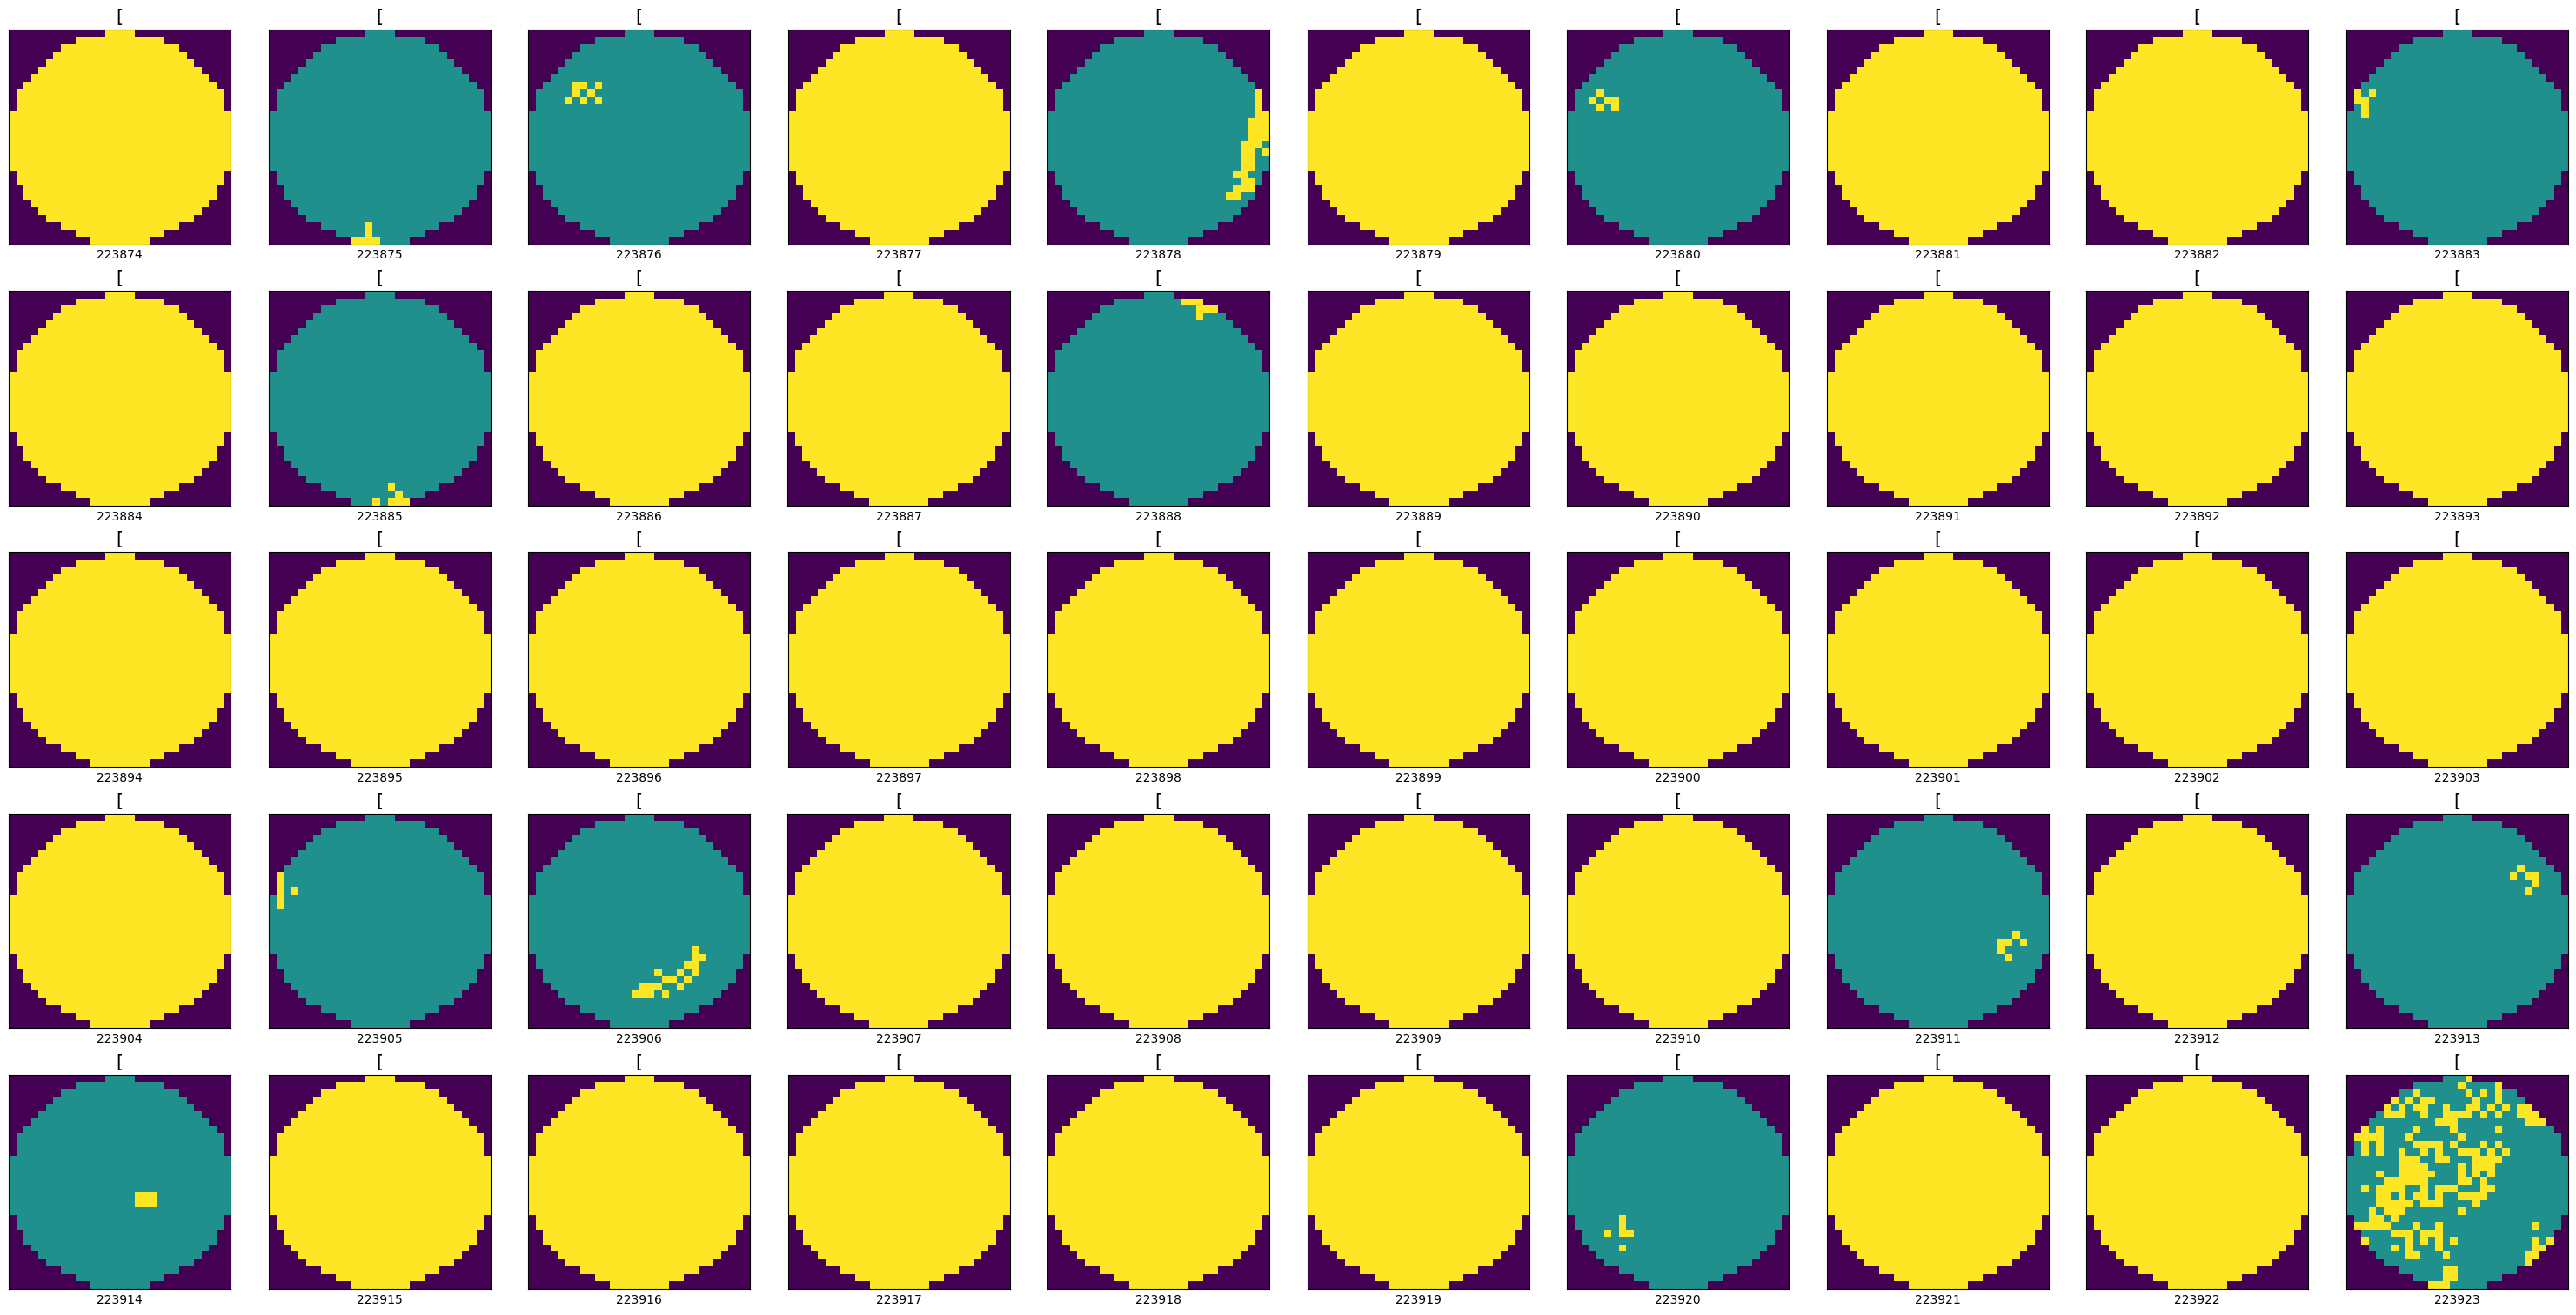

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Further filtering to include only rows where dieSize is 676
df_withpattern = none_label[none_label['dieSize'] == 676]

# 시각화
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(30, 30))
ax = ax.ravel(order='C')

for i in range(len(none_label)):
    img = none_label.iloc[i].waferMap
    ax[i].imshow(img)
    ax[i].set_title(none_label.iloc[i].failureType[0][0], fontsize=15)
    ax[i].set_xlabel(none_label.index[i], fontsize=10)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

# Hide any unused subplots
for j in range(len(none_label), 100):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()
